In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import warnings
from collections import Counter

In [2]:
df_kick = pd.read_csv('./data/ks-projects-201801.csv')
df_kick = df_kick.sample(10000,random_state=42).reset_index().drop('index',axis=1)

## UTIL Fonksiyonları

In [3]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def chi2_test(col, prob=.95):
    stat, p, dof, expected = stats.chi2_contingency((pd.crosstab(df_kick[col[0]], 
                                                                 df_kick[col[1]]
                                                                )))
    print("CHI-SQUARED TEST: ")
    # calculating the value to compare with chi2 statistic
    critical = stats.chi2.ppf(prob, dof)
    print(f'dof={dof}, probability={round(prob,3)}, critical={round(critical,5)}, stat={round(stat,5)}')
    print("Accept or Reject H0: ")
    # interpret test statistic
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
        
        
def ttest_onesided(cols, alpha = 0.05):
    """
    
    cols: list with the , we will test the mean of the population and the sample mean
    
    H0:
    The null Hypothesis is that the both distributions are the same
    H1:
    The alternative hypothesis is that the distributions are different
    
    """
    pop_mean = cols[0].mean()
    sample = cols[1]
    
    print(f"Mean of Population: {pop_mean} \nMean of Sample: {sample.mean()}")
    ttest_val, pval = stats.ttest_1samp(sample, pop_mean)

    print(f"t-test value: {ttest_val}")
    print("Comparing p_value by...\n")
    print(f'p-value result: {pval}')
    if pval < alpha:    # alpha value is 0.05 or 5%
        print(" we are rejecting null hypothesis")
    else:
        print("we are accepting null hypothesis")

    
    
def ttest_twosided(cols, alpha = 0.05):
    sample1 = cols[0]
    sample2 = cols[1]
    print(f"Mean of Sample 1: {sample1.mean()} \nMean of Sample 2: {sample2.mean()}")    
    ttest_val, pval = stats.ttest_ind(sample1, sample2)

    print(f"t-test value: {ttest_val}")
    # print("Comparing p_value by...\n")
    print(f'p-value result: {pval}')
    if pval < alpha:    # alpha value is 0.05 or 5%
        print(" we are rejecting null hypothesis")
    else:
        print("we are accepting null hypothesis")

In [4]:
resumetable(df_kick) # dfimizden ana bilgileri alıyoruz

Dataset Shape: (10000, 15)


Name   dtypes  Missing  Uniques          First Value  \
0                 ID    int64        0    10000           1576537356   
1               name   object        0     9999                 Deko   
2           category   object        0      158             Hardware   
3      main_category   object        0       15           Technology   
4           currency   object        0       14                  USD   
5           deadline   object        0     2617           2015-10-24   
6               goal  float64        0      779                70000   
7           launched   object        0    10000  2015-09-24 03:12:52   
8            pledged  float64        0     4601                 1888   
9              state   object        0        6               failed   
10           backers    int64        0      718                   41   
11           country   object        0       23                   US   
12       usd pledged  float64      105     5165                 1888   
13  usd_pledged_real  float64        0     5660                 1888   
14     usd_goal_real  float64        0     2769                70000   

                                         Second Value            Third Value  \
0                                           675907016              361890770   
1   Westside BJ's: The Gluten-Free, Organic Food T...  Crepe Diem Food Truck   
2                                         Food Trucks                   Food   
3                                                Food                   Food   
4                                                 USD                    USD   
5                                          2015-02-01             2014-01-17   
6                                              250000                  30000   
7                                 2015-01-02 20:55:07    2013-12-18 03:26:04   
8                                                1466                   5723   
9                                              failed                 failed   
10                                                  9                     90   
11                                                 US                     US   
12                                               1466                   5723   
13                                               1466                   5723   
14                                             250000                  30000   

    Entropy  
0     13.29  
1     13.29  
2      6.24  
3      3.57  
4      1.27  
5     11.06  
6      6.50  
7     13.29  
8     10.16  
9      1.52  
10     6.52  
11     1.47  
12    10.16  
13    10.67  
14     8.19

## Veri Setini Gözlemlemek

In [5]:
df_kick.head()

ID                                               name     category  \
0  1576537356                                               Deko     Hardware   
1   675907016  Westside BJ's: The Gluten-Free, Organic Food T...  Food Trucks   
2   361890770                              Crepe Diem Food Truck         Food   
3  1225211551  Season's End - A horror novel ready for public...      Fiction   
4  2122944289        Colorado City Arizona Restaurant (Canceled)  Restaurants   

  main_category currency    deadline      goal             launched  pledged  \
0    Technology      USD  2015-10-24   70000.0  2015-09-24 03:12:52   1888.0   
1          Food      USD  2015-02-01  250000.0  2015-01-02 20:55:07   1466.0   
2          Food      USD  2014-01-17   30000.0  2013-12-18 03:26:04   5723.0   
3    Publishing      GBP  2016-11-23    5500.0  2016-10-24 15:44:36     25.0   
4          Food      USD  2015-05-13   30000.0  2015-03-14 05:18:34    100.0   

      state  backers country  usd pledged  usd_pledged_real  usd_goal_real  
0    failed       41      US      1888.00           1888.00       70000.00  
1    failed        9      US      1466.00           1466.00      250000.00  
2    failed       90      US      5723.00           5723.00       30000.00  
3    failed        2      GB        23.24             31.09        6839.01  
4  canceled        3      US       100.00            100.00       30000.00

## Proje durumu gözlem

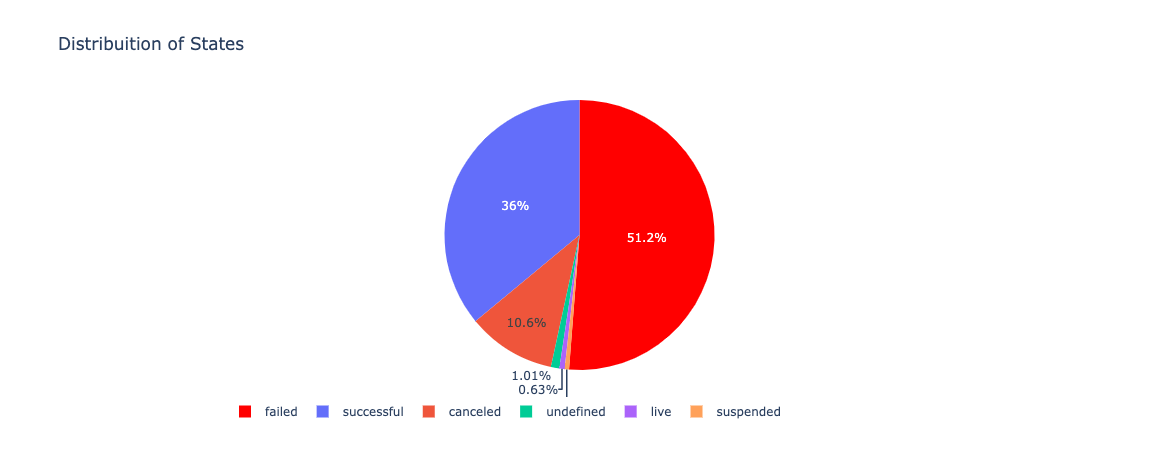

In [6]:
state = round(df_kick["state"].value_counts() / len(df_kick["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title='Distribuition of States', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)



In [7]:
df_kick.loc[df_kick.state.isin(['suspended', 'canceled']), 'state'] = 'failed'
df_kick = df_kick.loc[df_kick['state'].isin(['failed','successful'])] 

/Users/kaancetindag/opt/anaconda3/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



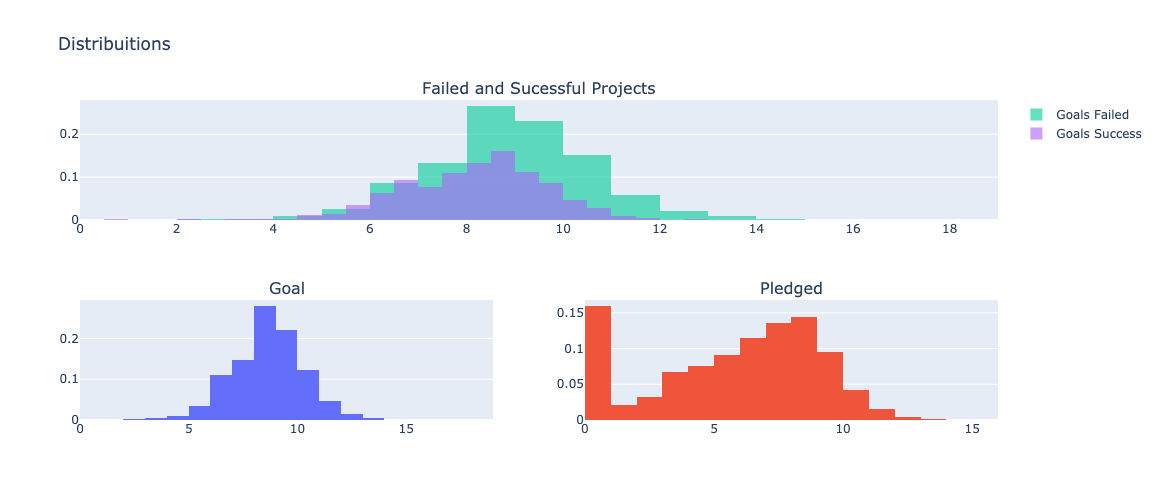

In [8]:
df_failed = df_kick[df_kick['state'] == 'failed'].sample(10000,replace=True)
df_success = df_kick[df_kick['state'] == 'successful'].sample(10000,replace=True)

#İlk plot
trace0 = go.Histogram(
    x=np.log(df_kick.usd_goal_real + 1),
    histnorm='probability',
    showlegend=False,
    xbins=dict(
        start=-5.0,
        end=19.0,
        size=1
    )
)


#İkinci plot
trace1 = go.Histogram(
    x=np.log(df_kick.usd_pledged_real + 1),
    histnorm='probability',
    showlegend=False,
    xbins=dict(
        start=-1.0,
        end=17.0,
        size=1
    )
)

#histogram verisi ekleme

failed = np.log(df_failed['usd_goal_real'] + 1)
success = np.log(df_success['usd_goal_real'] + 1)

trace3 = go.Histogram(
    x=failed,
    opacity=0.60,
    nbinsx=30,
    name='Goals Failed',
    histnorm='probability'
)

trace4 = go.Histogram(
    x=success,
    opacity=0.60,
    nbinsx=30,
    name='Goals Success',
    histnorm='probability'
)

data = [trace0,trace1,trace3,trace4]
layout = go.Layout(barmode='overlay')

#Grid oluşturma

fig = plotly.tools.make_subplots(rows=2, cols=2, specs=[ [{'colspan': 2}, None], [{}, {}]],
                          subplot_titles=('Failed and Sucessful Projects',
                                          'Goal','Pledged'))

fig.append_trace(trace0, 2, 1)
fig.append_trace(trace1, 2, 2)
fig.append_trace(trace3, 1, 1)
fig.append_trace(trace4, 1, 1)

fig['layout'].update(title="Distribuitions",
                     height=500, width=900, barmode='overlay')
iplot(fig)


In [9]:
from scipy.stats import shapiro

stat,p = shapiro(np.log(df_kick['usd_goal_real']+1).sample(500,random_state=42))


print('Shapiro stat: ',stat)
print('P-value', p)

if p >= 0.01:
    print('Normal distribution')
else:
    print('Non-normal distribution')

Shapiro stat:  0.9851675033569336
P-value 5.5819669796619564e-05
Non-normal distribution


## T-test

In [10]:
#One sampled

ttest_onesided([np.log(df_kick['usd_goal_real']+1),success])

Mean of Population: 8.647170386299388 
Mean of Sample: 8.139933696403045
t-test value: -33.2974682364596
Comparing p_value by...

p-value result: 1.2098940982010432e-230
 we are rejecting null hypothesis


In [11]:
#Two sampled

ttest_twosided([failed, success], alpha=.01)


Mean of Sample 1: 8.923131376870012 
Mean of Sample 2: 8.139933696403045
t-test value: 34.46745510079263
p-value result: 5.978550684426879e-253
 we are rejecting null hypothesis


## Scaling And Engineering Some Features

In [12]:
df_kick['pledged_log'] = np.log(df_kick['usd_pledged_real'] + 1)
df_kick['goal_log'] = np.log(df_kick['usd_goal_real'] + 1)

df_kick['diff_pledged_goal'] = round((df_kick['usd_pledged_real'] /df_kick['usd_goal_real']) * 100, 2)
df_kick['diff_pledged_goal'] = df_kick['diff_pledged_goal'].astype(float)

In [13]:
print("Min Goal and Pledged values")
print(df_kick[["goal", "pledged"]].min())
print("")
print("Mean Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].mean(),2))
print("")
print("Median Goal and Pledged values")
print(df_kick[["goal", "pledged"]].median())
print("")
print("Max Goal and Pledged values")
print("goal       100000000.0") #If i put the both together give me back log values, 
print("pledged     20338986.27") # so i decide to just show this values
print("dtype: float64")
print("")
print("Std Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].std(),2))

Min Goal and Pledged values
goal       1.0
pledged    0.0
dtype: float64

Mean Goal and Pledged values
goal       48597.13
pledged    10161.46
dtype: float64

Median Goal and Pledged values
goal       5500.0
pledged     657.5
dtype: float64

Max Goal and Pledged values
goal       100000000.0
pledged     20338986.27
dtype: float64

Std Goal and Pledged values
goal       1326157.56
pledged     110087.28
dtype: float64


## Durum Değişkenine Göre Dağılımlar

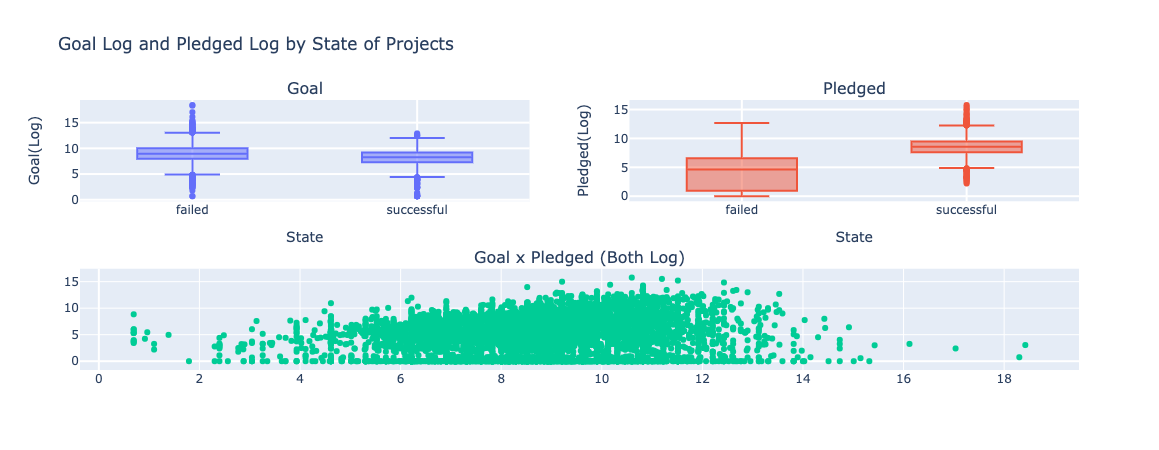

In [14]:
#first plot

trace0 = go.Box(
    x=df_kick['state'],
    y=df_kick['goal_log'],
    name='Goal Log',
    showlegend=False
)

#second plot

trace1 = go.Box(
    x=df_kick['state'],
    y=df_kick['pledged_log'],
    name='Pledged Log',
    showlegend=False
)

#third plot

trace2 = go.Scatter(
    x=df_kick['goal_log'],
    y=df_kick['pledged_log'],
    name='Goal x Pledged Dist.',
    showlegend=False,
    mode='markers'
)

#creating grid

fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Goal','Pledged',
                                          "Goal x Pledged (Both Log)"))


#setting the figs

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,1,2)
fig.append_trace(trace2,2,1)

fig['layout'].update(showlegend=True, 
                     title="Goal Log and Pledged Log by State of Projects",
                     xaxis=dict(
                         title='State', ticklen=5, zeroline=False, gridwidth=2
                     ),
                     yaxis=dict(
                         title='Goal(Log)', ticklen=5, gridwidth=2
                     ),
                     xaxis1=dict(title='State', ticklen=5, zeroline=False, gridwidth=2),
                     yaxis1=dict(title='Goal(Log)', ticklen=5, gridwidth=2),
                     xaxis2=dict(title='State', ticklen=5, zeroline=False, gridwidth=2),
                     yaxis2=dict(title='Pledged(Log)', ticklen=5, gridwidth=2))
iplot(fig)


## Kategorileri Araştırmak

In [15]:
main_cats = df_kick['main_category'].value_counts()
main_cats_failed = df_kick[df_kick['state'] == 'failed']['main_category'].value_counts()
main_cats_success = df_kick[df_kick['state'] == 'successful']['main_category'].value_counts()

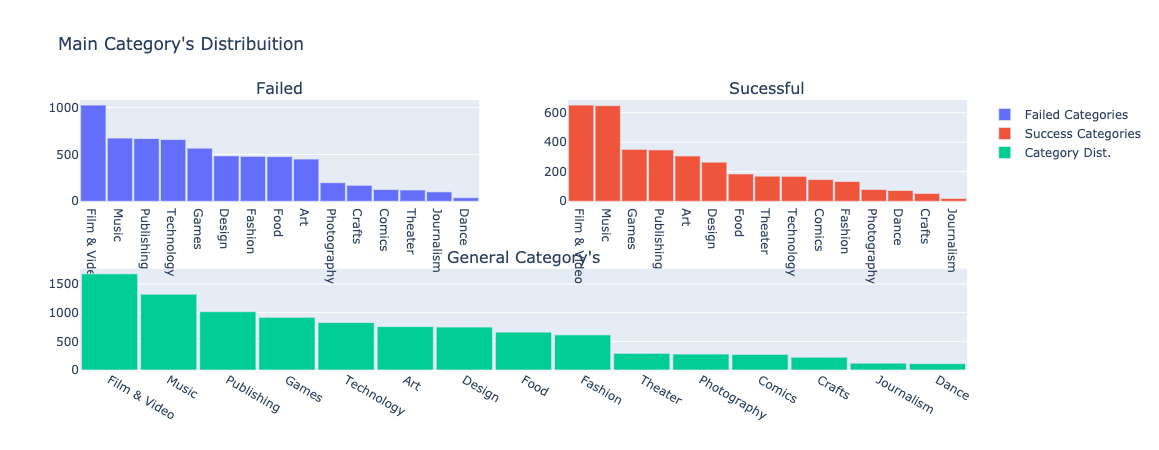

In [16]:
#first plot

trace0 = go.Bar(
    x=main_cats_failed.index,
    y=main_cats_failed.values,
    name='Failed Categories'
)

#second plot

trace1 = go.Bar(
    x=main_cats_success.index,
    y=main_cats_success.values,
    name='Success Categories'
)

#third plot

trace2 = go.Bar(
    x=main_cats.index,
    y=main_cats.values,
    name='Category Dist.'
)

fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Failed','Sucessful', "General Category's"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True,
                     title="Main Category's Distribuition",
                     bargap=0.05)
iplot(fig)

In [17]:
chi2_test(['state','main_category'])

CHI-SQUARED TEST: 
dof=14, probability=0.95, critical=23.68479, stat=454.683
Accept or Reject H0: 
Dependent (reject H0)


In [18]:
print("Looking Goal and Pledged Mean by state ")
print(round(df_kick.groupby(["state"])["goal", "usd_pledged_real"].mean(),2))

Looking Goal and Pledged Mean by state 
                goal  usd_pledged_real
state                                 
failed      71309.37           1504.08
successful   9288.93          24162.95


<ipython-input-18-14752927ed04>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



/Users/kaancetindag/opt/anaconda3/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



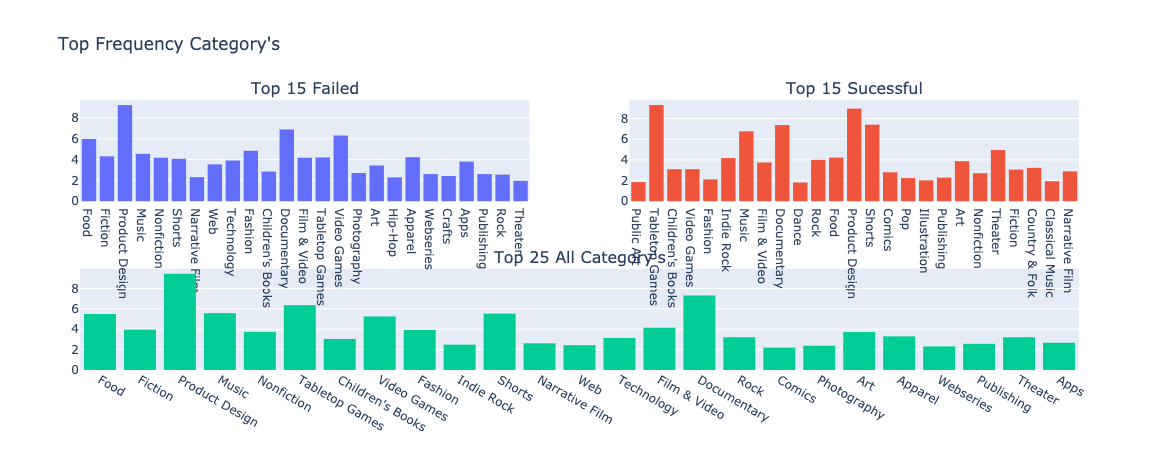

In [19]:
categorys_failed = df_kick[df_kick["state"] == "failed"]["category"].value_counts()[:25]
categorys_sucessful = df_kick[df_kick["state"] == "successful"]["category"].value_counts()[:25]
categorys_general = df_kick["category"].value_counts()[:25]

#First plot
trace0 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['category'].head(100000),
    histnorm='percent', name="Top 15 Failed", showlegend=False
)
#Second plot
trace1 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['category'].head(100000),
    histnorm='percent', name="Top 15 Sucessful", showlegend=False
)

#Third plot
trace2 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_general.index.values))]['category'].head(100000),
    histnorm='percent', name="Top 25 All Category's", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Top 15 Failed','Top 15 Sucessful', "Top 25 All Category's"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Top Frequency Category's")
iplot(fig)

## Further look at top 10 categories

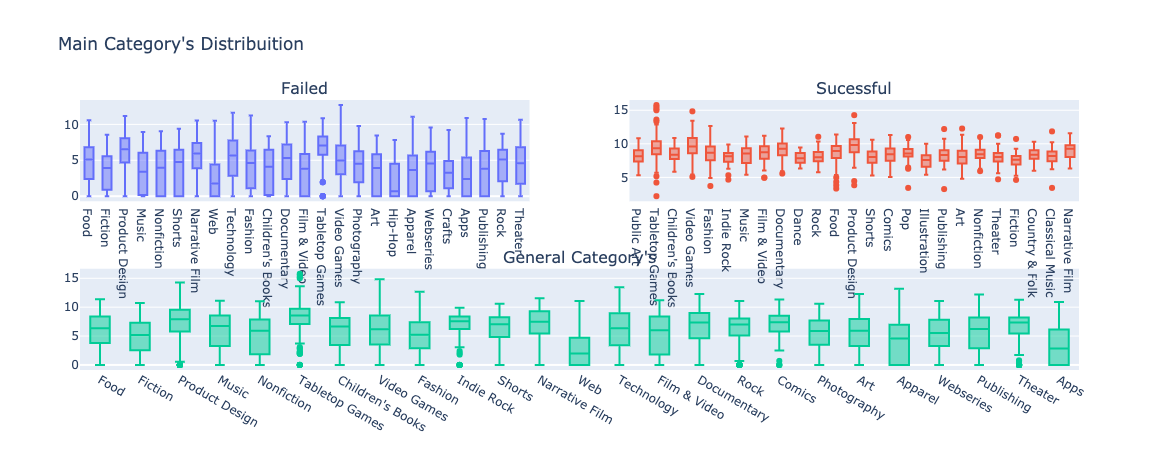

In [20]:
#First plot
trace0 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['category'],
    y=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['pledged_log'].head(100000),
    name="Failed Category's", showlegend=False
)

#Second plot
trace1 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['category'],
    y=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['pledged_log'].head(100000),
    name="Sucessful Category's", showlegend=False
)

#Third plot
trace2 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_general.index.values))]['category'],
    y=df_kick[(df_kick.category.isin(categorys_general.index.values))]['pledged_log'].head(100000),
    name="All Category's Distribuition", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Failed','Sucessful', "General Category's", ))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Main Category's Distribuition")
iplot(fig)

## Top 10 Başarısız Kategoriler

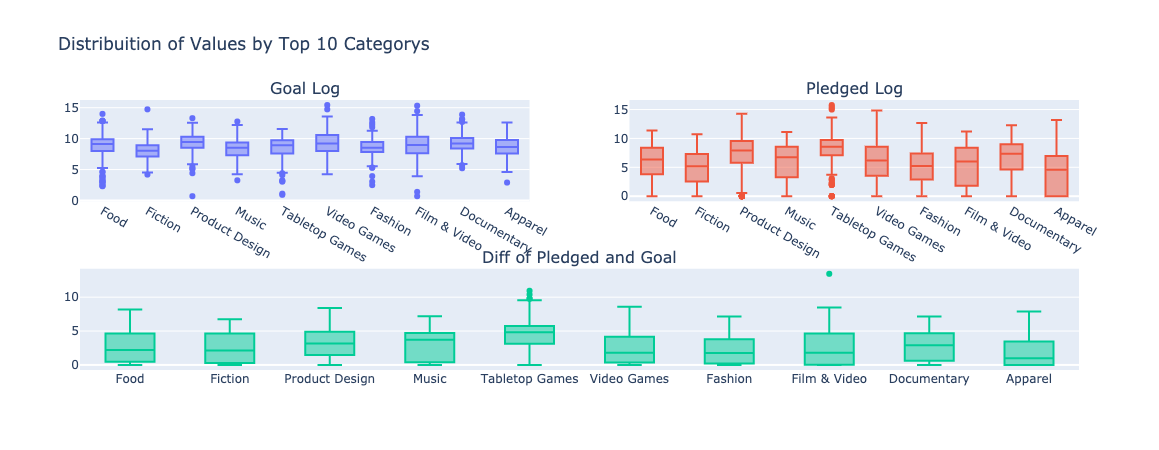

In [21]:
cat_fill = df_kick[df_kick.category.isin(categorys_failed[:10].index.values)]

#First plot
trace0 = go.Box(
    x=cat_fill['category'],
    y=cat_fill['goal_log'].head(100000),
    name="Failed Category's", showlegend=False
)

#Second plot
trace1 = go.Box(
    x=cat_fill['category'],
    y=cat_fill['pledged_log'].head(100000),
    name="Sucessful Category's", showlegend=False
)

#Third plot
trace2 = go.Box(
    x=cat_fill['category'],
    y=np.log(cat_fill['diff_pledged_goal'] + 1).head(100000),
    name="Pledged", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Goal Log','Pledged Log', "Diff of Pledged and Goal", ))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, 
                     title="Distribuition of Values by Top 10 Categorys")
iplot(fig)

## Top 3 Başarısız ve Başarılı Proje İncelemesi

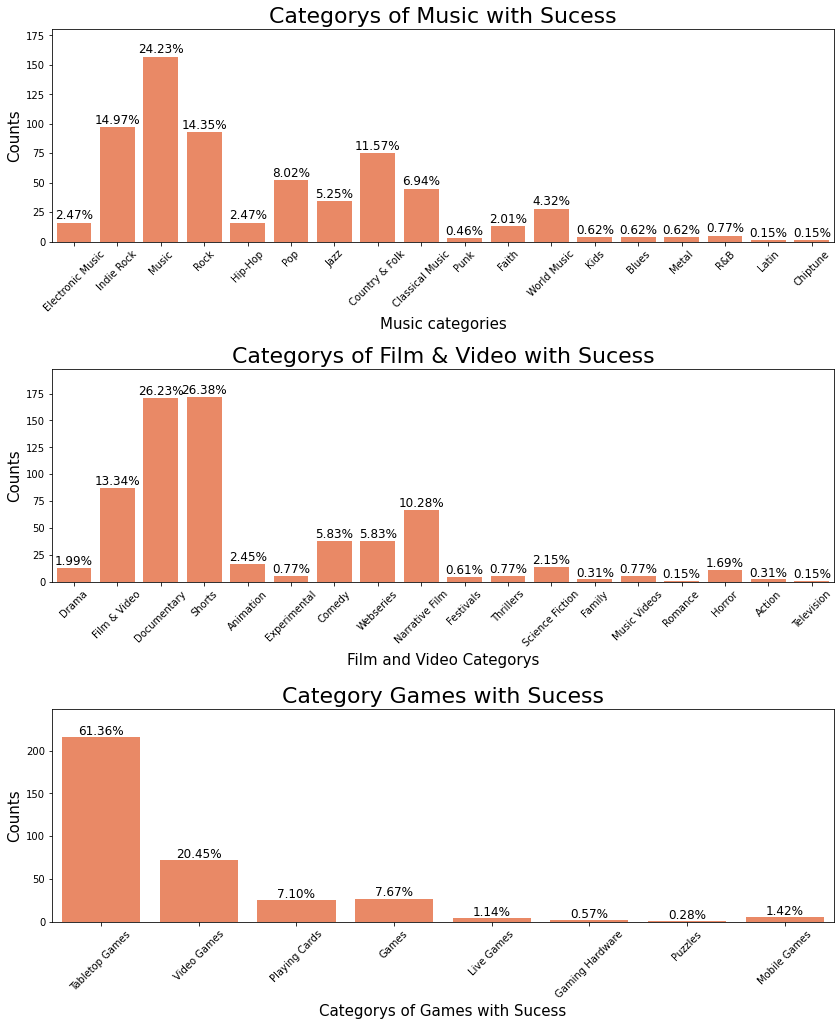

In [22]:
sucess_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'successful')]
sucess_filme_video = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'successful')]
sucess_games = df_kick[(df_kick['main_category'] == 'Games') & 
                      (df_kick['state'] == 'successful')]


plt.figure(figsize=(14,16))

total = len(df_kick)
plt.subplot(311)
ax0 = sns.countplot(x='category',data=sucess_music,color='coral')
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=45)
ax0.set_title("Categorys of Music with Sucess", fontsize=22)
ax0.set_xlabel("Music categories", fontsize=15)
ax0.set_ylabel("Counts", fontsize=15)

sizes=[]

for p in ax0.patches:
    height = p.get_height()
    sizes.append(height)
    ax0.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_music)*100),
            ha="center", fontsize=12) 
ax0.set_ylim(0, max(sizes) * 1.15)

plt.subplot(312)
ax1 = sns.countplot(x='category',data=sucess_filme_video,color='coral')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Categorys of Film & Video with Sucess", fontsize=22)
ax1.set_xlabel("Film and Video Categorys", fontsize=15)
ax1.set_ylabel("Counts", fontsize=15)

sizes=[]

for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_filme_video)*100),
            ha="center", fontsize=12) 
ax1.set_ylim(0, max(sizes) * 1.15)

plt.subplot(313)
ax2 = sns.countplot(x='category',data=sucess_games,color='coral')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Category Games with Sucess", fontsize=22)
ax2.set_xlabel("Categorys of Games with Sucess", fontsize=15)
ax2.set_ylabel("Counts", fontsize=15)
sizes=[]
for p in ax2.patches:
    height = p.get_height()
    sizes.append(height)
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_games)*100),
            ha="center", fontsize=12) 
ax2.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(wspace = 0.3, hspace = 0.6,top = 0.9)

plt.show()

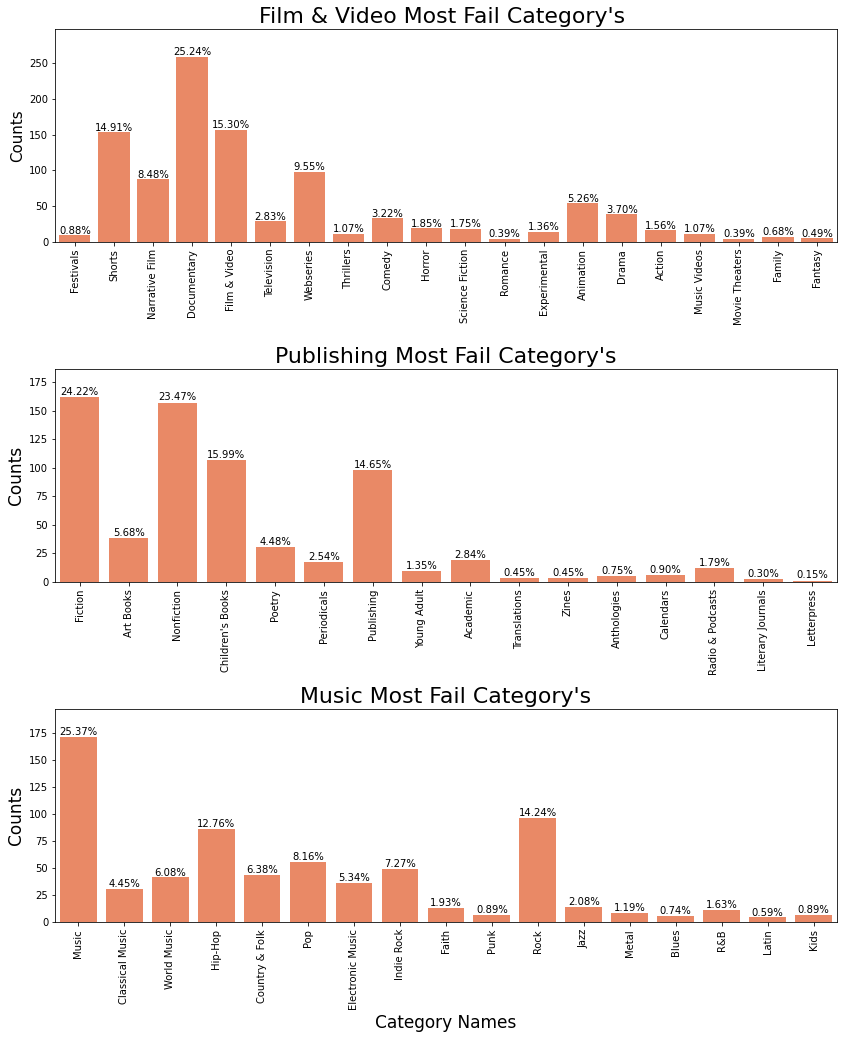

In [23]:
failed_film = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'failed')]
failed_publishing = df_kick[(df_kick['main_category'] == 'Publishing') & 
                      (df_kick['state'] == 'failed')]
failed_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'failed')]

plt.figure(figsize=(14,16))

plt.subplot(3,1,1)
ax0 = sns.countplot(x='category', data=failed_film, color='coral')
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title("Film & Video Most Fail Category's ", fontsize=22)
ax0.set_xlabel("", fontsize=15)
ax0.set_ylabel("Counts", fontsize=15)
sizes=[]
for p in ax0.patches:
    height = p.get_height()
    sizes.append(height)
    ax0.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_film)*100),
            ha="center", fontsize=10) 
ax0.set_ylim(0, max(sizes) * 1.15)

plt.subplot(3,1,2)
ax1 = sns.countplot(x='category', data=failed_publishing, color='coral')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Publishing Most Fail Category's", fontsize=22)
ax1.set_xlabel("", fontsize=17)
ax1.set_ylabel("Counts", fontsize=17)
sizes=[]
for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_publishing)*100),
            ha="center", fontsize=10) 
ax1.set_ylim(0, max(sizes) * 1.15)

plt.subplot(3,1,3)
ax2 = sns.countplot(x='category', data=failed_music, 
                    color='coral')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Music Most Fail Category's", fontsize=22)
ax2.set_xlabel("Category Names", fontsize=17)
ax2.set_ylabel("Counts", fontsize=17)
sizes=[]
for p in ax2.patches:
    height = p.get_height()
    sizes.append(height)
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_music)*100),
            ha="center", fontsize=10) 
ax2.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.6,top = 0.9)

plt.show()

## Süre İncelemesi

In [24]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['launched_date'] = df_kick['launched'].dt.date

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['deadline_date'] = pd.to_datetime(df_kick['deadline']).dt.date




In [25]:
#Creating a new columns with Campaign total months
df_kick['time_campaign_d'] = (df_kick['deadline_date'] - df_kick['launched_date']).dt.days
df_kick['time_campaign_d'] = df_kick['time_campaign_d'].astype(int)

#removing outlier value
df_kick = df_kick[df_kick['time_campaign_d'] != 14867]

df_kick['time_campaign'] = round(df_kick['time_campaign_d'] / 30 )

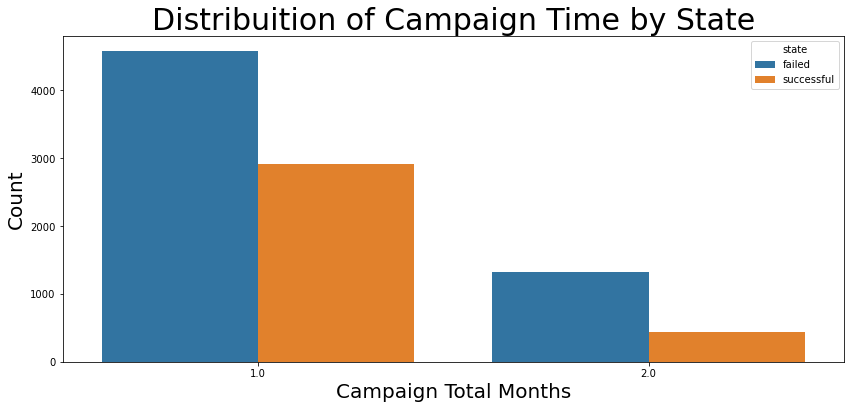

In [26]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='time_campaign',
                   hue='state',
                   data=df_kick[(df_kick['time_campaign'] > .7) & (df_kick['time_campaign'] < 2.1)]
)
ax.set_title("Distribuition of Campaign Time by State", fontsize=30)
ax.set_xlabel("Campaign Total Months", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()


## Launched Distributions

In [28]:
df_kick['laun_month_year'] = df_kick.launched.dt.month
df_kick['laun_year'] = df_kick.launched.dt.year

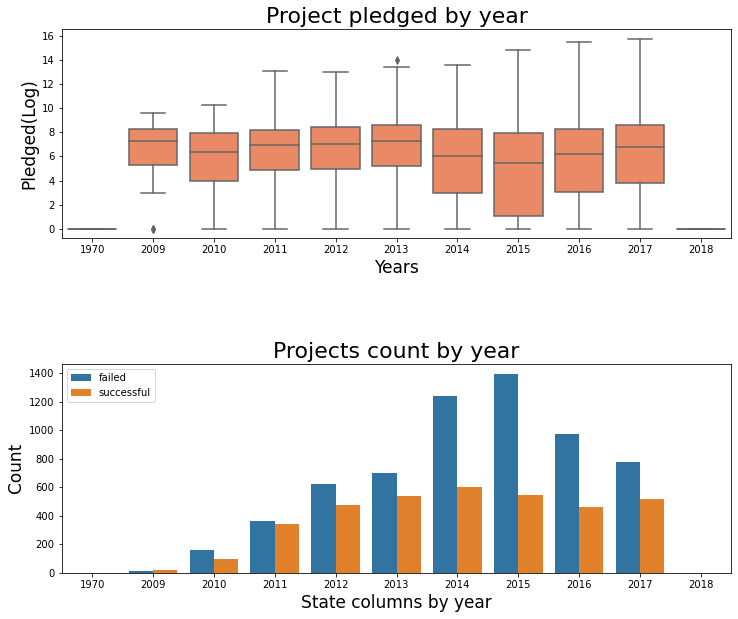

In [30]:
year = df_kick.laun_year.value_counts()
month = df_kick.laun_month_year.value_counts()

fig,ax = plt.subplots(2,1,figsize=(12,10))

plt.subplot(211)
ax1 = sns.boxplot(x='laun_year',y='pledged_log',
                 data=df_kick,color='coral')
ax1.set_title('Project pledged by year',fontsize=22)
ax1.set_xlabel('Years',fontsize=17)
ax1.set_ylabel('Pledged(Log)',fontsize=17)


plt.subplot(212)
ax2 = sns.countplot(x='laun_year',hue='state',data=df_kick)
ax2.set_title('Projects count by year',fontsize=22)
ax2.set_xlabel('State columns by year',fontsize=17)
ax2.set_ylabel('Count',fontsize=17)
ax2.legend(loc='upper left')

plt.subplots_adjust(hspace=0.6)

plt.show()


## Launched Month Distributions

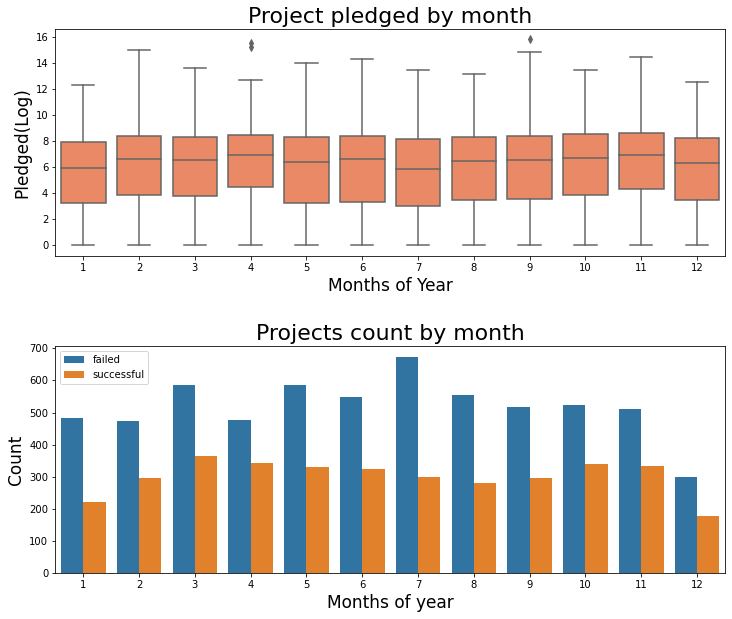

In [32]:
fig,ax = plt.subplots(2,1,figsize=(12,10))

plt.subplot(211)
ax1 = sns.boxplot(x='laun_month_year',y='pledged_log',data=df_kick,color='coral')
ax1.set_title('Project pledged by month',fontsize=22)
ax1.set_xlabel('Months of Year',fontsize=17)
ax1.set_ylabel('Pledged(Log)',fontsize=17)


plt.subplot(212)
ax2 = sns.countplot(x='laun_month_year',hue='state',data=df_kick)
ax2.set_title('Projects count by month',fontsize=22)
ax2.set_xlabel('Months of year',fontsize=17)
ax2.set_ylabel('Count',fontsize=17)
ax2.legend(loc='upper left')

plt.subplots_adjust(hspace=0.4)

plt.show()



## Taking a look athe the distribuition of Diff Pledged sucessful and failed Projects

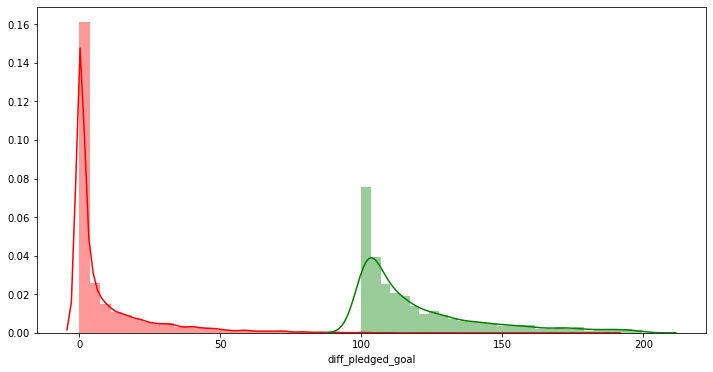

In [33]:
plt.figure(figsize = (12,6))
sns.distplot(df_kick[(df_kick['diff_pledged_goal'] < 200) & 
                     (df_kick['state'] == 'failed')]['diff_pledged_goal'], color='r')
sns.distplot(df_kick[(df_kick['diff_pledged_goal'] < 200) & 
                     (df_kick['state'] == 'successful')]['diff_pledged_goal'],color='g')
plt.show()

## Month Launched Projects

In [34]:
df_kick['laun_month_year'] = df_kick['launched'].dt.to_period('M').astype('str')

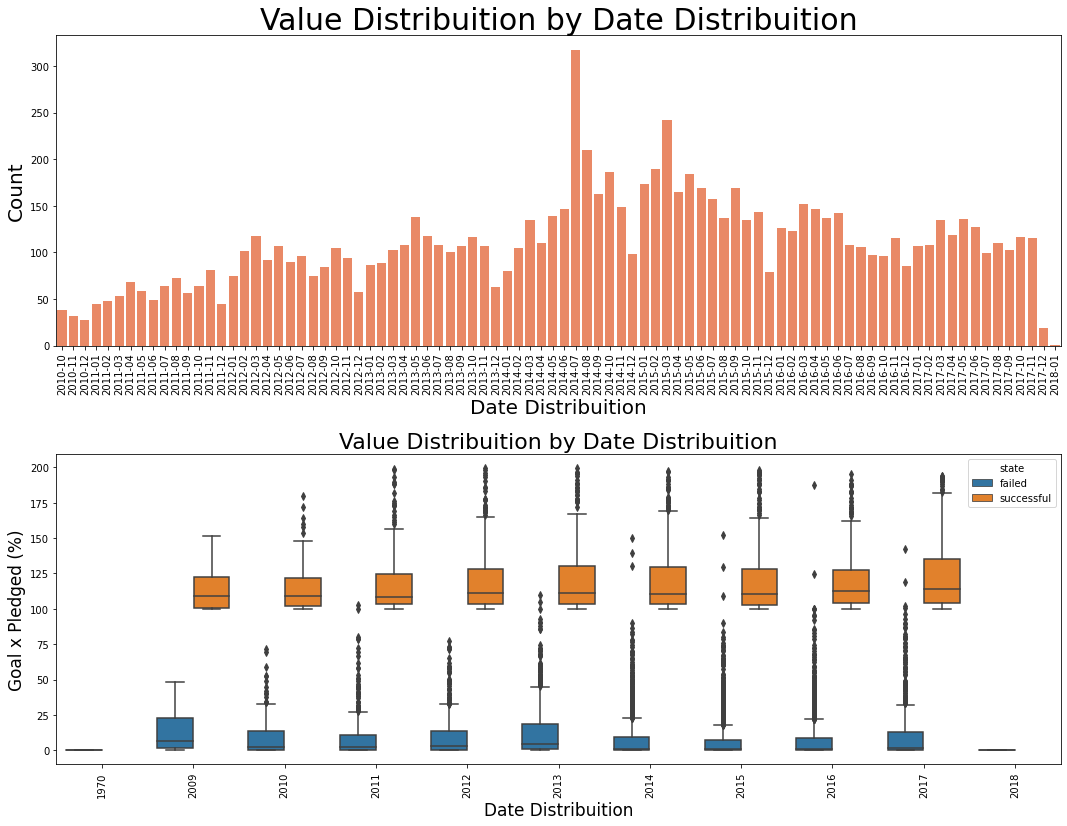

In [35]:
plt.figure(figsize=(18,15))

plt.subplots_adjust(hspace=0.35,top=0.8)

g1 = plt.subplot(211)
g1 = sns.countplot(x="laun_month_year", data=df_kick, color='coral',
                   order=df_kick['laun_month_year'].value_counts().index.sort_values()[19:] )
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Value Distribuition by Date Distribuition", fontsize=30)
g1.set_xlabel("Date Distribuition", fontsize=20)
g1.set_ylabel("Count", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="laun_year", y="diff_pledged_goal",
                 data=df_kick[df_kick['diff_pledged_goal'] < 200], 
                 hue="state")
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
g2.set_title("Value Distribuition by Date Distribuition", fontsize=22)
g2.set_xlabel("Date Distribuition", fontsize=17)
g2.set_ylabel("Goal x Pledged (%)", fontsize=17)

plt.show()

## Goals

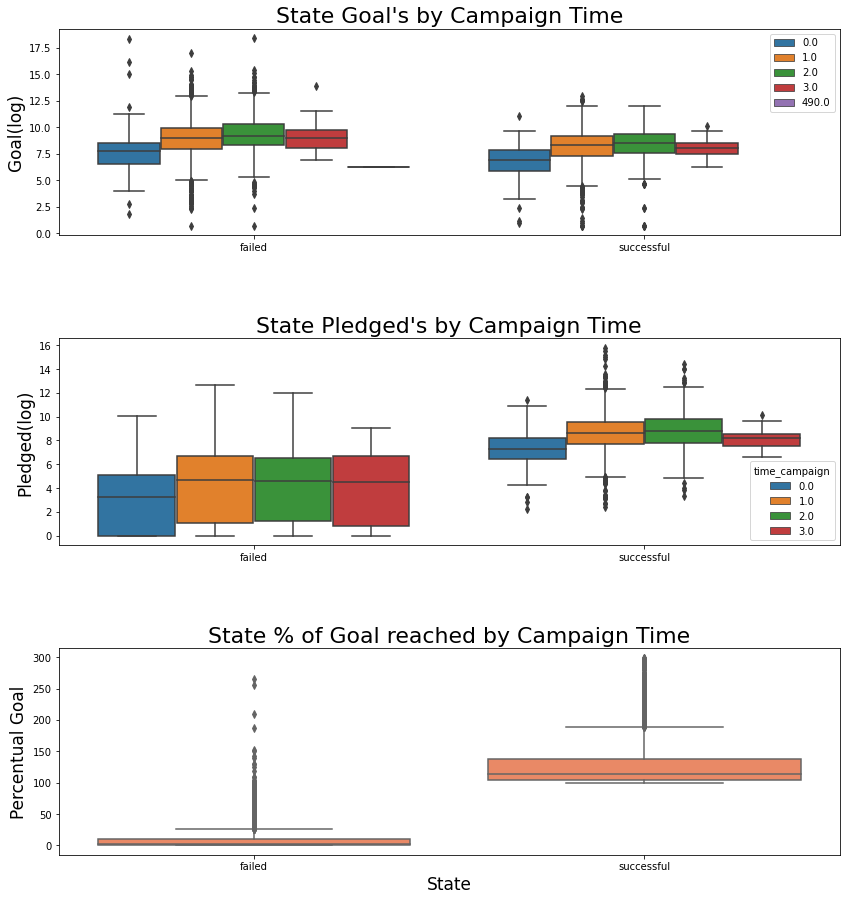

In [36]:
plt.figure(figsize = (14,17))

plt.subplots_adjust(hspace = 0.50, top = 0.8)

plt.subplot(311)
g =sns.boxplot(x='state', y='goal_log', 
            data=df_kick, 
            hue='time_campaign')
g.set_title("State Goal's by Campaign Time", fontsize=22)
g.set_xlabel("", fontsize=17)
g.set_ylabel("Goal(log)", fontsize=17)
g.legend(loc='upper right')

plt.subplot(312, sharex=g)
g1 = sns.boxplot(x='state', y='pledged_log', 
            data=df_kick[df_kick['time_campaign'] < 10], 
            hue='time_campaign')
g1.set_title("State Pledged's by Campaign Time", fontsize=22)
g1.set_xlabel("", fontsize=17)
g1.set_ylabel("Pledged(log)", fontsize=17)

plt.subplot(313)
g2 = sns.boxplot(x='state', y='diff_pledged_goal', color='coral',
                 data=df_kick[df_kick['diff_pledged_goal'] < 300])
g2.set_title("State % of Goal reached by Campaign Time", fontsize=22)
g2.set_xlabel("State", fontsize=17)
g2.set_ylabel("Percentual Goal", fontsize=17)


plt.show()

In [37]:
df_kick.groupby(['state'])['diff_pledged_goal'].median()

state
failed          1.550
successful    116.605
Name: diff_pledged_goal, dtype: float64

## Distribution of Backers

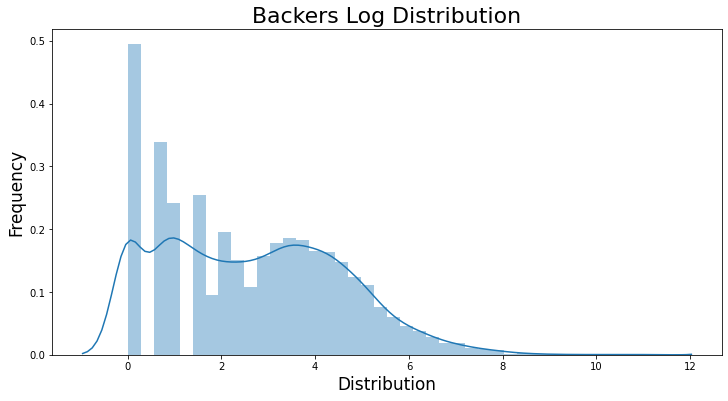

In [39]:
df_kick['backers_log'] = np.log(df_kick['backers'] + 1 ) 
#The + 1 is to normalize the zero or negative values

plt.figure(figsize = (12,6))
g = sns.distplot(df_kick['backers_log'])
g.set_xlabel("Distribution", fontsize=17)
g.set_ylabel("Frequency", fontsize=17)
g.set_title("Backers Log Distribution", fontsize=22)

plt.show()

## Backers by State¶

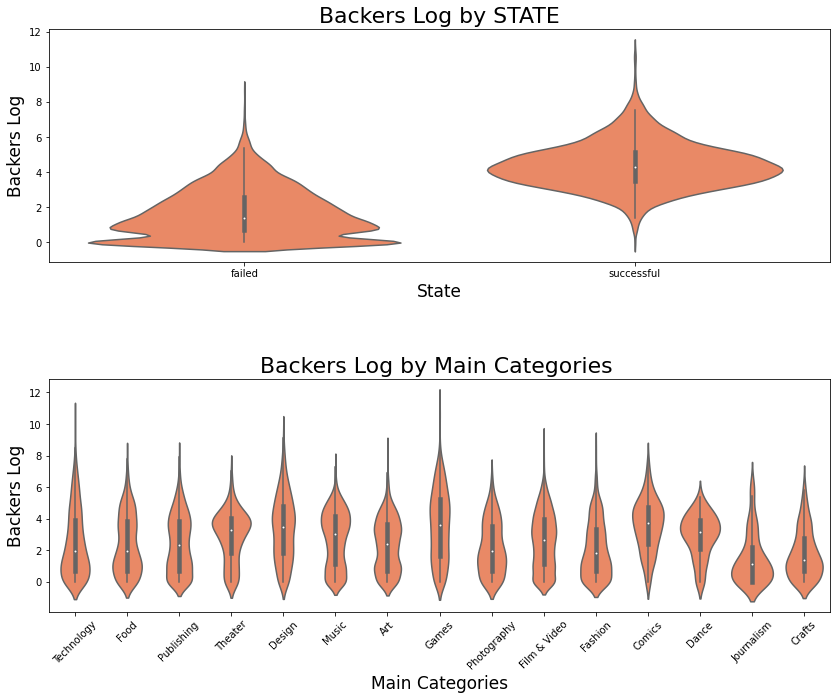

In [40]:
plt.figure(figsize = (14,12))

plt.subplots_adjust(hspace = 0.50, top = 0.8)

plt.subplot(211)
g = sns.violinplot(x='state',y='backers_log',
                   color='coral', data=df_kick)
g.set_title("Backers Log by STATE", fontsize=22)
g.set_xlabel("State", fontsize=17)
g.set_ylabel("Backers Log", fontsize=17)

plt.subplot(212)
g1 = sns.violinplot(x='main_category',y='backers_log', 
                   color='coral', data=df_kick)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Backers Log by Main Categories ", fontsize=22)
g1.set_xlabel("Main Categories", fontsize=17)
g1.set_ylabel("Backers Log", fontsize=17)

plt.show()

## Backers by Years

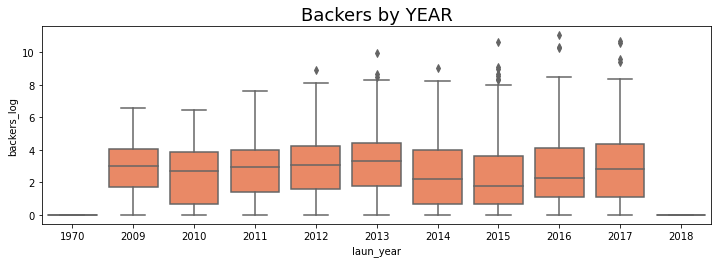

In [41]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.boxplot(x='laun_year',y='backers_log', 
                color='coral',
               data=df_kick, 
                order=df_kick['laun_year'].value_counts().index.sort_values().values)
g.set_title("Backers by YEAR", fontsize=18)

plt.show()

# Word Cloud - Project Names

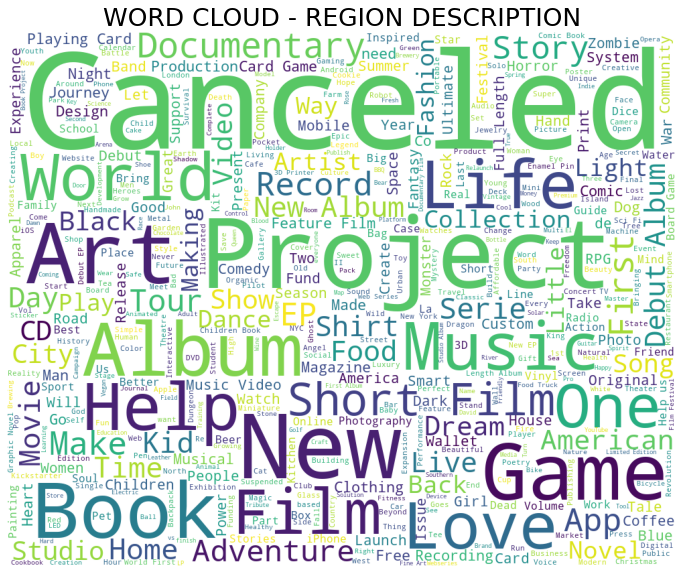

In [43]:
from wordcloud import WordCloud,STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import *
from sklearn.feature_extraction import stop_words

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=500,
    max_font_size=200,
    width=1000,
    height=800,
    random_state=42  
).generate(' '.join(df_kick['name'].dropna().astype(str)))

print(wordcloud)

fig = plt.figure(figsize=(12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - REGION DESCRIPTION",fontsize=25)
plt.axis('off')

plt.show()
